# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

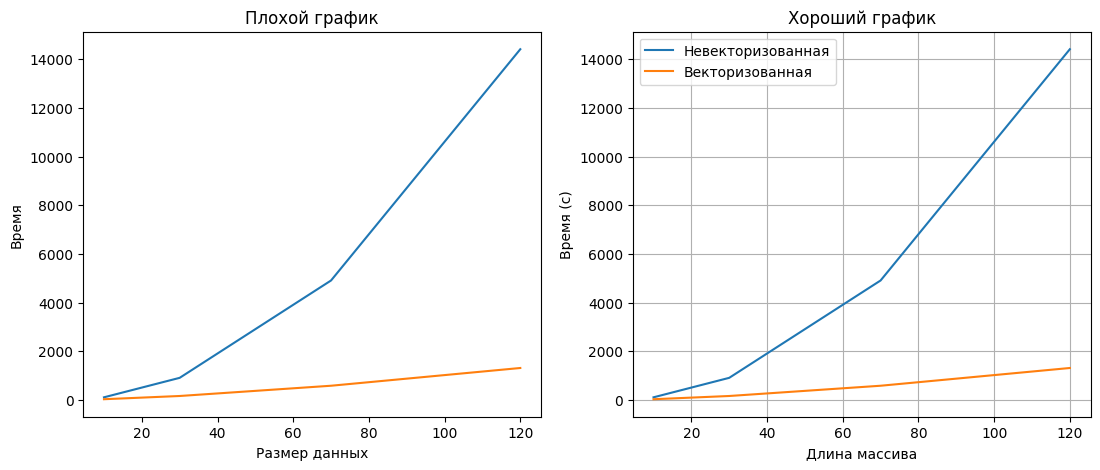

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

0.0006932740585759501

0.0006932740585759501


/tmp/ipython-input-1838732400.py:19: RuntimeWarning: overflow encountered in scalar multiply
  p *= m[i][i]


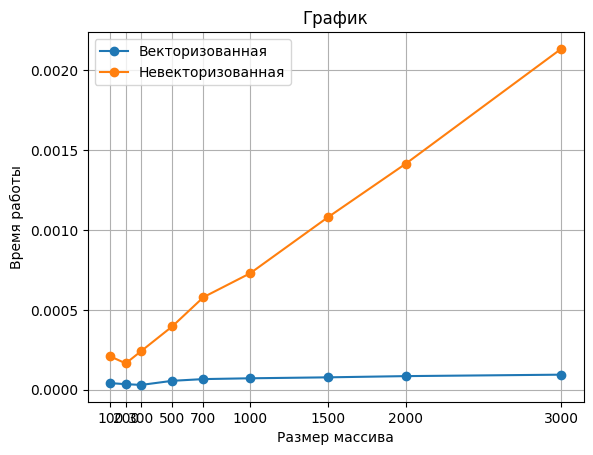

In [7]:

import random
import time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

def prod_non_zero_diag(m):
    l = min(len(m), len(m[0]))
    p = 1
    for i in range(l):
        if(m[i][i]):
            p *= m[i][i]
    return p

def prod_non_zero_diag_vect(m):
    d = np.diag(m)
    return d[d != 0].prod()

m = np.random.rand(x, y)


print(prod_non_zero_diag(m))
print("")

start_time = time.time()

print(prod_non_zero_diag_vect(m))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    m = np.random.randint(-10, 10, (size_a, size_a))
    start_time = time.time()
    prod_non_zero_diag(m)
    non_v =  time.time() - start_time
    start_time = time.time()
    prod_non_zero_diag_vect(m)
    v = time.time() - start_time
    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()



* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


True 
 True


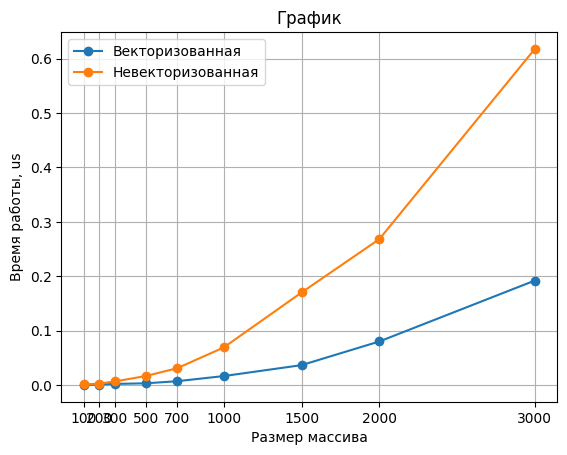

In [9]:
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

m1 = [1, 2, 3, 4]
m2 = [2, 3, 1, 4]


def are_multisets_equal(m1, m2):
    if(len(m1) != len(m2)):
        return False
    m1.sort()
    m2.sort()
    for i in range(len(m1)):
        if(m1[i] != m2[i]):
            return False
    return True

def are_multisets_equal_vect(m1, m2):
  x_n, x_c = np.unique(m1, return_counts=True)
  y_n, y_c = np.unique(m2, return_counts=True)
  if(np.shape(x_n) != np.shape(y_n)):
      return False
  if(np.any(x_n != y_n) or np.any(x_c != y_c)):
      return False
  return True
  pass


print(are_multisets_equal(m1, m2), '\n', are_multisets_equal_vect(m1, m2))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    m1 = np.random.randint(-10, 10, (size_a, size_a))
    m2 = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    are_multisets_equal(m1.tolist(), m2.tolist())

    non_v =  time.time() - start_time

    start_time = time.time()

    are_multisets_equal_vect(m1, m2)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

7 
 5


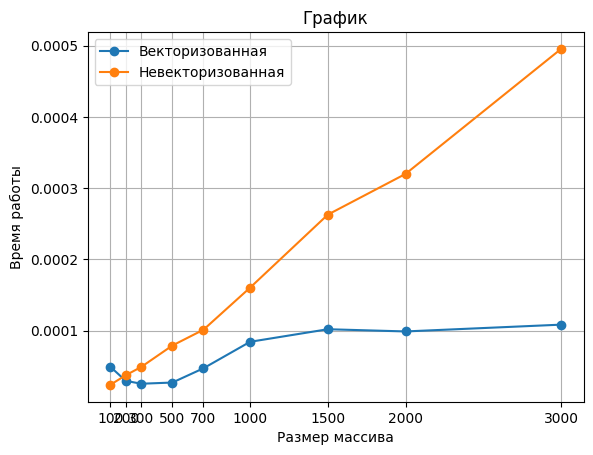

In [15]:
import numpy as np
import random
import time
%matplotlib inline
import matplotlib.pyplot as plt

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

m = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

def max_after_zero(m):
    mx = max(m)
    for i in range(1, len(m)):
        if (not(m[i - 1])) :
            mx = max(mx, m[i])
    return mx

def max_after_zero_vect(m):
  num = np.where(m[:len(m) - 1] == 0)
  num = np.array(num) + 1
  return np.max(m[(num.tolist())])

print(max_after_zero(m), '\n', max_after_zero_vect(m))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    m = np.random.randint(-10, 10, (size_a))

    start_time = time.time()

    max_after_zero(m.tolist())

    non_v =  time.time() - start_time

    start_time = time.time()

    max_after_zero_vect(m)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()



* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


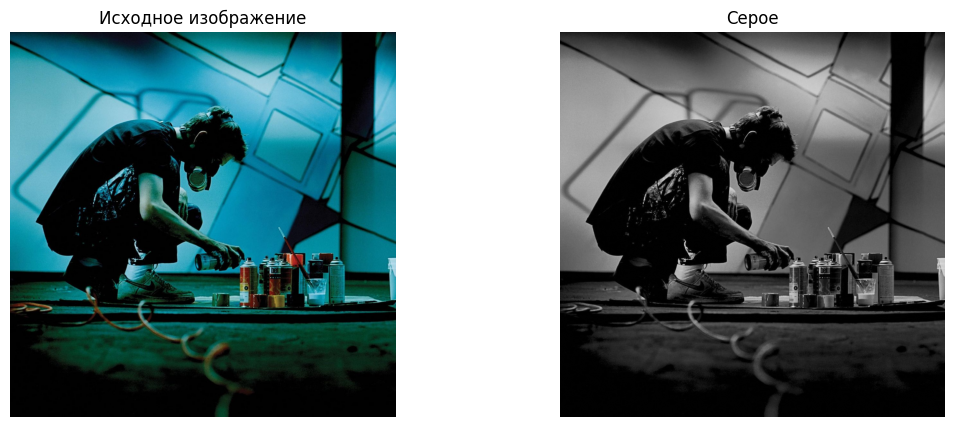

In [33]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline


def convert_image(img, coefs):
    height = len(img)
    width = len(img[0])
    res_img = list()
    for i in range(height):
        now_str = list()
        for j in range(width):
            sum = 0
            for k in range(len(coefs)):
                sum += img[i][j][k] * coefs[k]
            now_str.append(sum)
        res_img.append(now_str)
    return res_img

def convert_image_vect(img, coefs):
  return np.sum(img * coefs, axis = -1)


img = imread("/meteora.jpg")
coefs = np.array([0.2989, 0.5870, 0.1140])
img_grey = convert_image_vect(img, coefs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Серое')
ax2.axis('off')

fig.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

([np.float64(0.20698085943911693), np.float64(0.17626798056830595), np.float64(0.7963480217322766), np.float64(0.7255971210442371), np.float64(0.6396672503751629), np.float64(0.4246167045428857)], [1, 1, 1, 1, 1, 1]) (array([0.20698086, 0.17626798, 0.79634802, 0.72559712, 0.63966725,
       0.4246167 ]), array([1, 1, 1, 1, 1, 1]))


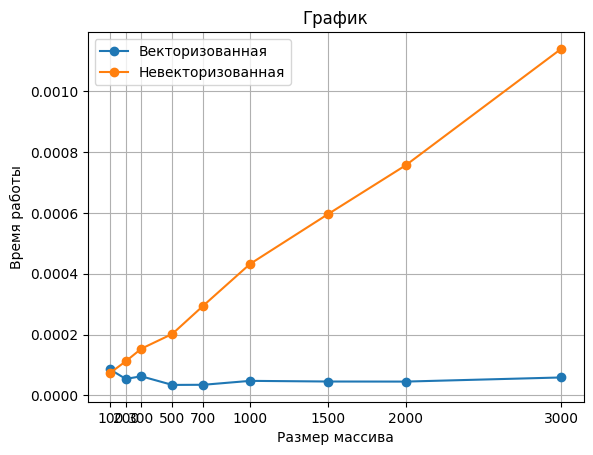

In [20]:
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

m = np.random.rand(x)


def run_length_encoding(m):
    ans = [m[0]]
    ansl = list()
    k = 1
    for i in range(1, len(m)):
        if(m[i - 1] == m[i]):
            k += 1
        else:
            ans.append(m[i])
            ansl.append(k)
            k = 1
    ansl.append(k)
    return (ans, ansl)

def run_length_encoding_vect(m):
    y = np.hstack((np.ones(1), m[:- 1]))
    p = m != y
    p[0] = True
    i1 = np.arange(np.size(m))[p]
    i2 = np.hstack((i1[1:], np.array([np.size(m)])))
    return m[p], i2 - i1

print(run_length_encoding(m), run_length_encoding_vect(m))


size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    m = np.random.randint(-10, 10, (size_a))

    start_time = time.time()

    run_length_encoding(m)

    non_v =  time.time() - start_time

    start_time = time.time()

    run_length_encoding_vect(m)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

[[1.2574932975125936, 1.1389255189766754, 0.9482775406267648, 0.6237099694648343, 0.5455636759010106, 0.8700627615275824, 1.5561945251005378], [0.7591676411677554, 0.8938869781332404, 0.9965560199222827, 1.0520368955122474, 1.424703259778173, 0.7381052330421423, 0.750516905028959], [1.1266197590821787, 1.41581608673299, 0.978439430953721, 1.118569434246299, 0.7605630217699294, 1.105174118177931, 1.2786022498080145], [1.3797124340546345, 0.8445271054978696, 1.2281247434755385, 0.9530165627348938, 1.3996968554858569, 0.9954090907942115, 1.2280699231912722], [1.2810446210947823, 1.1436688310788374, 0.8739834832099393, 1.0242497930430872, 0.8972082843048056, 1.0673787628698528, 1.0196576895634109], [1.6578585846141787, 1.1018326030503527, 1.4017097576138862, 1.344237805668985, 1.379669282378771, 1.243969217995852, 1.184332116860373], [1.105105282495889, 0.8118700123024772, 0.8008619032921003, 1.1791933967418275, 1.290068274104063, 0.8598073500219596, 1.1646989510286334]] 
 [[1.2574933  1.1

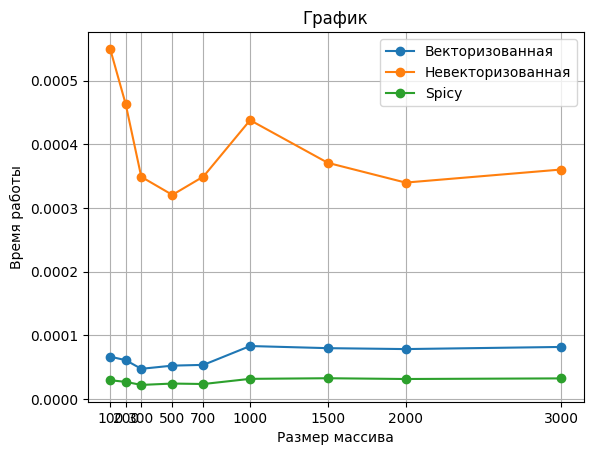

In [26]:
import numpy as np
import random
import math
from scipy.spatial import distance

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

m1 = np.random.rand(x, y)
m2 = np.random.rand(x, y)

def pairwise_distance(m1, m2):
    rasst = list()
    for i in range(len(m1)):
        ans = list()
        for j in range(len(m2)):
            b = 0
            for k in range(len(m1[0])):
                b += (m1[i][k] - m2[j][k]) ** 2
            ans.append(math.sqrt(b))
        rasst.append(ans)
    return rasst

def pairwise_distance_vect(m1, m2):
    return np.sqrt(np.sum((m1[:, np.newaxis] - m2) ** 2, axis = -1))

print(pairwise_distance(m1, m2), '\n', pairwise_distance_vect(m1, m2), '\n', distance.cdist(m1, m2, 'euclidean'))


size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []
s_1 = []

for size_a in size_d:
    m = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    pairwise_distance(m1, m2)

    non_v =  time.time() - start_time

    start_time = time.time()

    pairwise_distance_vect(m1, m2)

    v = time.time() - start_time

    start_time = time.time()

    distance.cdist(m1, m2, 'euclidean')

    s = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)
    s_1.append(s)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.plot(size_d, s_1, label="Spicy", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here